In [ ]:
!pip install scikit-learn
!pip install xgboost
!pip install shap

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.cluster import KMeans


In [ ]:
# Replace the file path with the correct path to your CSV file
file_path = "../data/final_dataset_with_stock_price.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [ ]:
data.head()

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
# Get the number of rows in the dataset
num_rows = len(data)
for i in range(0,num_rows):
    headline=re.sub('[^a-zA-Z]',' ', data['headline'][i]) #every punctuation by everything we want (we will replace everything that is not letter to space)
    headline=headline.lower()
    headline=headline.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    headline=[ps.stem((word)) for word in headline if not word in set(all_stopwords)]
    headline=' '.join(headline)
    corpus.append(headline)
    
    
# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Define batch size
batch_size = 10000
num_batches = len(corpus) // batch_size + (1 if len(corpus) % batch_size != 0 else 0)

# Process each batch and save the results incrementally
output_file_path = "../data/final_dataset_with_cleaned_and_sentiment.xlsx"
for batch_num in range(num_batches):
    start_idx = batch_num * batch_size
    end_idx = min(start_idx + batch_size, len(corpus))
    batch_corpus = corpus[start_idx:end_idx]

    sentiment_labels = []
    for headline in batch_corpus:
        result = sentiment_analyzer(headline)[0]
        sentiment_labels.append(0 if result['label'] == 'NEGATIVE' else 1)

    # Update the DataFrame with the sentiment labels for the current batch
    data.loc[start_idx:end_idx-1, 'sentiment'] = sentiment_labels

    # Save the DataFrame to an Excel file after each batch
    data.to_excel(output_file_path, index=False)

    print(f"Processed batch {batch_num+1} of {num_batches} and saved to {output_file_path}")

print("Batch processing complete. Final results saved.")

In [2]:
# Replace the file path with the correct path to your CSV file
file_path = "../data/final_dataset_with_cleaned_and_sentiment.xlsx"

# Read the CSV file into a pandas DataFrame
data = pd.read_excel(file_path)

In [5]:
data.head()

,date,headline,Open,Close,Difference (%),cleaned_headline,sentiment
0,3/20/2018,Jim Cramer : A better way to invest in the Cov...,244.465456,244.474487,0.003694,jim cramer better way invest covid vaccin gold...,0.0
1,3/20/2018,Cramer's lightning round : I would own Teradyne,244.465456,244.474487,0.003694,cramer lightn round would teradyn,0.0
2,3/20/2018,"Cramer's week ahead : Big week for earnings , ...",244.465456,244.474487,0.003694,cramer week ahead big week earn even bigger we...,1.0
3,3/20/2018,IQ Capital CEO Keith Bliss says tech and healt...,244.465456,244.474487,0.003694,iq capit ceo keith bliss say tech healthcar ralli,0.0
4,3/20/2018,Wall Street delivered the 'kind of pullback I'...,244.465456,244.474487,0.003694,wall street deliv kind pullback wait jim crame...,0.0


In [7]:
clean_data=data[['cleaned_headline','Open','Close']].copy()
print(clean_data)

                                          cleaned_headline        Open  \
0        jim cramer better way invest covid vaccin gold...  244.465456   
1                        cramer lightn round would teradyn  244.465456   
2        cramer week ahead big week earn even bigger we...  244.465456   
3        iq capit ceo keith bliss say tech healthcar ralli  244.465456   
4        wall street deliv kind pullback wait jim crame...  244.465456   
...                                                    ...         ...   
1048570           ba suspend gatwick flight due coronaviru  240.161607   
1048571  councillor oven readi scheme forc privat schoo...  240.161622   
1048572  councillor oven readi scheme forc privat schoo...  240.161607   
1048573  councillor oven readi scheme forc privat schoo...  240.161638   
1048574  councillor oven readi scheme forc privat schoo...  240.161591   

              Close  
0        244.474487  
1        244.474487  
2        244.474487  
3        244.474487  
4

In [9]:
clean_data

,cleaned_headline,Open,Close
0,jim cramer better way invest covid vaccin gold...,244.465456,244.474487
1,cramer lightn round would teradyn,244.465456,244.474487
2,cramer week ahead big week earn even bigger we...,244.465456,244.474487
3,iq capit ceo keith bliss say tech healthcar ralli,244.465456,244.474487
4,wall street deliv kind pullback wait jim crame...,244.465456,244.474487
...,...,...,...
1048570,ba suspend gatwick flight due coronaviru,240.161607,235.135864
1048571,councillor oven readi scheme forc privat schoo...,240.161622,235.135879
1048572,councillor oven readi scheme forc privat schoo...,240.161607,235.135864
1048573,councillor oven readi scheme forc privat schoo...,240.161638,235.135895


In [11]:
clean_data = clean_data.dropna(subset=['Open'])
print(clean_data.count())

cleaned_headline    941915
Open                941915
Close               941915
dtype: int64


In [111]:
clean_data = clean_data.copy()
clean_data['Movement'] = (clean_data['Close'] > clean_data['Open']).astype(int)


In [113]:
# Prepare features and target
X_text = clean_data[['cleaned_headline']]
X_open = clean_data[['Open']]
y = clean_data['Movement']
print(X_text.count())
print(X_open.count())
print(y.count())

cleaned_headline    941915
dtype: int64
Open    941915
dtype: int64
941915


In [17]:

X_train_text, X_test_text,X_open_train,X_open_test, y_train, y_test = train_test_split(X_text,X_open, y, test_size=0.2, random_state=42)


In [19]:
X_open_train[['Open']]

,Open
521592,238.357070
347384,238.357070
524411,238.357038
149966,244.429371
802906,236.516373
...,...
259178,241.731570
365838,238.357007
131932,244.429371
777815,236.516343


In [21]:

# Initialize StandardScaler for Open prices
scaler = StandardScaler()
X_open_train_scaled = scaler.fit_transform(X_open_train)
X_open_test_scaled = scaler.transform(X_open_test)


In [23]:
X_open_test_scaled

array([[-0.93937483],
       [ 1.7292158 ],
       [ 1.7292158 ],
       ...,
       [ 0.8194107 ],
       [ 1.72923124],
       [-0.93935958]])

In [25]:
vectorizer = TfidfVectorizer(max_features=1000)

# get tf-df values
X_train_text_tfidf = vectorizer .fit_transform(X_train_text['cleaned_headline']) 
X_test_text_tfidf = vectorizer.transform(X_test_text['cleaned_headline'])

In [85]:

# Convert the matrix to a dense array and print
print(X_train_text_tfidf.toarray())

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['account' 'accus' 'act' 'action' 'activ' 'activist' 'ad' 'add'
 'administr' 'advertis' 'advis' 'affect' 'age' 'agenc' 'agenda' 'agre'
 'agreement' 'ahead' 'aid' 'aim' 'air' 'airbu' 'aircraft' 'airlin'
 'airport' 'airway' 'alibaba' 'alleg' 'allianc' 'allow' 'almost'
 'alphabet' 'amazon' 'america' 'american' 'amid' 'among' 'analyst'
 'announc' 'annual' 'anoth' 'anti' 'antitrust' 'app' 'appeal' 'appl'
 'appoint' 'approv' 'april' 'arabia' 'aramco' 'around' 'arrest' 'asda'
 'asia' 'ask' 'asset' 'attack' 'australia' 'australian' 'auto' 'automak'
 'aviat' 'avoid' 'away' 'back' 'bad' 'bailout' 'ban' 'bank' 'banker'
 'bankruptci' 'barclay' 'base' 'batteri' 'battl' 'bayer' 'bear' 'beat'
 'becom' 'begin' 'behind' 'benefit' 'best' 'bet' 'better' 'beyond' 'bid'
 'big' 'biggest' 'bill' 'billion' 'billionair' 'bitcoin' 'bite' 'black'
 'blackrock'

In [29]:

# Train XGBoost for numerical features
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1,
    alpha=1,   
    # L1 regularization term on weights
    )  # L2 regularization term on weights
xgb_model.fit(X_open_train_scaled, y_train)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
# Train Logistic Regression for text data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_text_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Predict on test data
y_pred_text = log_reg.predict(X_test_text_tfidf)
y_pred_open = xgb_model.predict(X_open_test_scaled)

In [35]:
print(y_pred_text)
print(y_pred_open)



[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 1]


In [37]:
# Evaluate Logistic Regression
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_text)}')

# Evaluate XGBoost
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_open)}')

Logistic Regression Accuracy: 0.5462913320204053
XGBoost Accuracy: 1.0


In [39]:
# Combining the predictions
# Here we are simply averaging the probabilities for illustration
# You can use more sophisticated methods like stacking for combining
def combine_predictions(pred_text, pred_open):
    # Average predictions for demonstration
    return (pred_text + pred_open) / 2


In [41]:
# For binary classification, you might want to convert average predictions to class labels
def final_prediction(pred_prob):
    return np.round(pred_prob)

In [43]:
# Combine predictions and evaluate
combined_preds = combine_predictions(y_pred_text, y_pred_open)
final_preds = final_prediction(combined_preds)

print(f'Combined Model Accuracy: {accuracy_score(y_test, final_preds)}')



Combined Model Accuracy: 0.5464399653896583


In [45]:

print(combined_preds)
print(y_pred_text)
print(y_pred_open)
print(final_preds)

[0.5 0.  0.  ... 0.  0.  0.5]
[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 1]
[0. 0. 0. ... 0. 0. 0.]


<Figure size 1000x800 with 0 Axes>

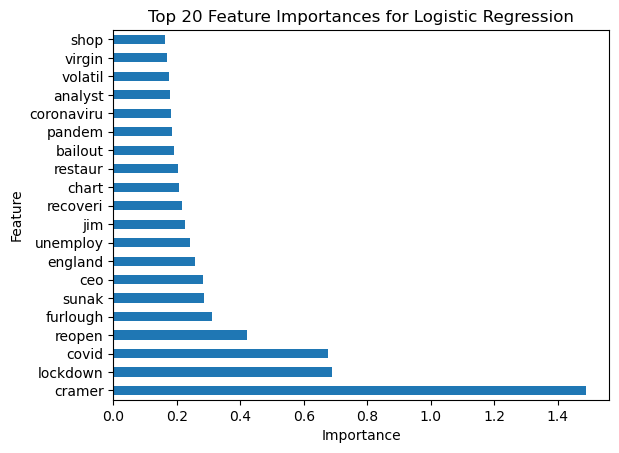

In [47]:

# Feature Importance for Logistic Regression
coefficients = log_reg.coef_.flatten()
importance = np.abs(coefficients)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(10, 8))
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top 20 Feature Importances for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



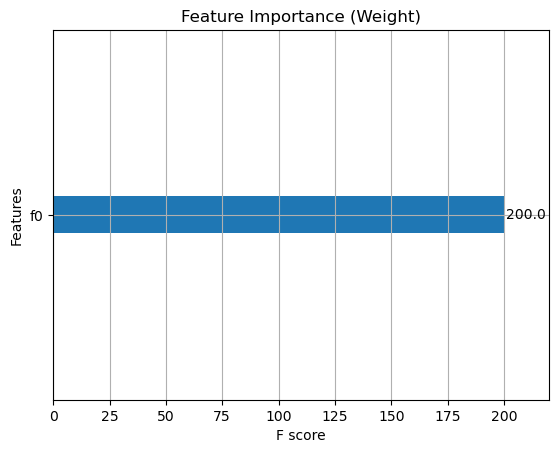

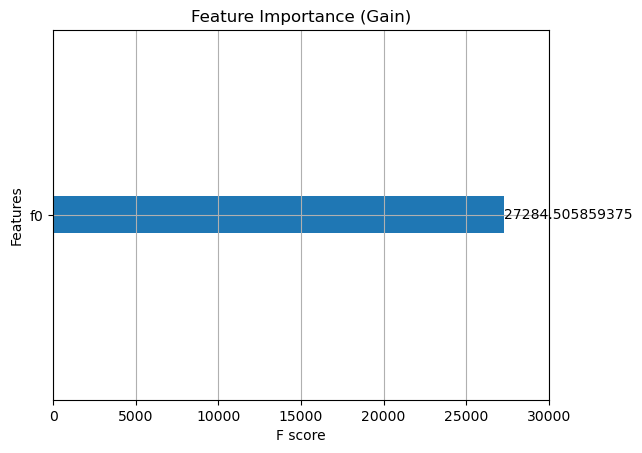

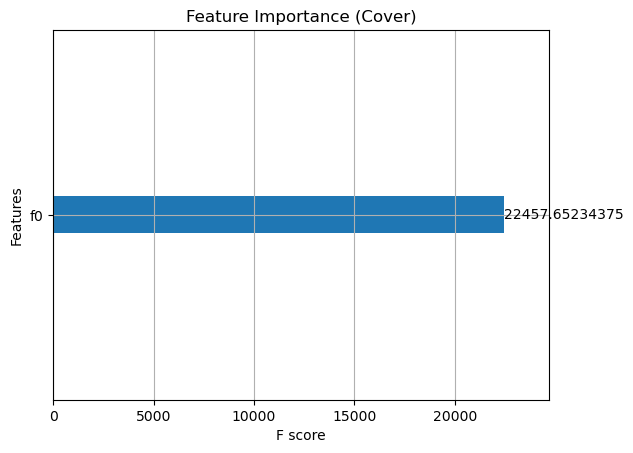

In [49]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', title='Feature Importance (Weight)')
plt.show()

xgb.plot_importance(xgb_model, importance_type='gain', title='Feature Importance (Gain)')
plt.show()

xgb.plot_importance(xgb_model, importance_type='cover', title='Feature Importance (Cover)')
plt.show()

In [51]:
# Create a SHAP explainer
explainer_xgb = shap.TreeExplainer(xgb_model, X_open_train_scaled)

In [53]:
shap_values_xgb = explainer_xgb(X_open_test_scaled)


100%|===================| 187604/188383 [01:53<00:00]        

In [55]:
shap_values_xgb

.values =
array([[  9.48249948],
       [-11.55821391],
       [-11.55821391],
       ...,
       [-11.55821391],
       [-11.55821391],
       [  9.48249948]])

.base_values =
array([0.93509486, 0.93509486, 0.93509486, ..., 0.93509486, 0.93509486,
       0.93509486])

.data =
array([[-0.93937483],
       [ 1.7292158 ],
       [ 1.7292158 ],
       ...,
       [ 0.8194107 ],
       [ 1.72923124],
       [-0.93935958]])

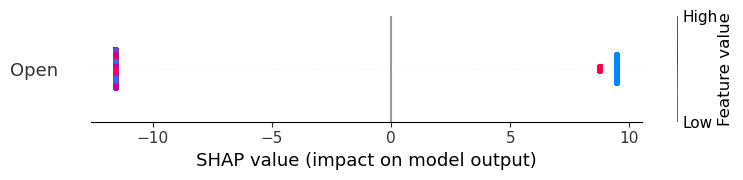

In [57]:
shap.summary_plot(shap_values_xgb, X_open_test_scaled, feature_names=['Open'])


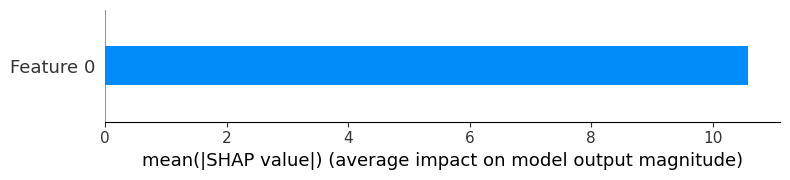

In [59]:
shap.summary_plot(shap_values_xgb, X_open_test_scaled, plot_type='bar')


In [61]:
explainer_xgb.expected_value

0.9350948567060726

In [63]:
shap.initjs()

# Compute SHAP values for a specific instance (e.g., the first instance in the test set)

shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[10].values, X_open_test_scaled[10])


In [65]:
# Logistic Regression feature importance
log_reg_coeffs = log_reg.coef_[0]
features = vectorizer.get_feature_names_out()

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(log_reg_coeffs)
}).sort_values(by='Importance', ascending=False)

print(importance_df)

      Feature  Importance
203    cramer    1.487796
518  lockdown    0.687091
202     covid    0.675734
723    reopen    0.421685
371  furlough    0.309023
..        ...         ...
471    justic    0.000387
532      made    0.000386
33    america    0.000201
656     pound    0.000115
209     crude    0.000015

[1000 rows x 2 columns]


In [81]:
# Summarize the background data using K-means clustering
#background_data = shap.kmeans(X_train_text_tfidf, 100)  # Summarize into 100 clusters

#background_data = shap.sample(X_train_text_tfidf, 100)  # Sample 100 instances
# Create the explainer with the summarized background data
#explainer_log = shap.KernelExplainer(log_reg.predict_proba, background_data)  # Adjust if using LinearExplainer


# Summarize the background data using K-means clustering
n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_train_text_tfidf)
cluster_indices = kmeans.predict(X_train_text_tfidf)
background_data = kmeans.cluster_centers_

In [87]:
# Create the explainer with the summarized background data
explainer_log = shap.LinearExplainer(log_reg, background_data, feature_perturbation="interventional")


In [89]:

# Compute SHAP values for the first 100 samples of the test data
shap_values_log = explainer_log.shap_values(shap.sample(X_test_text_tfidf, 100))


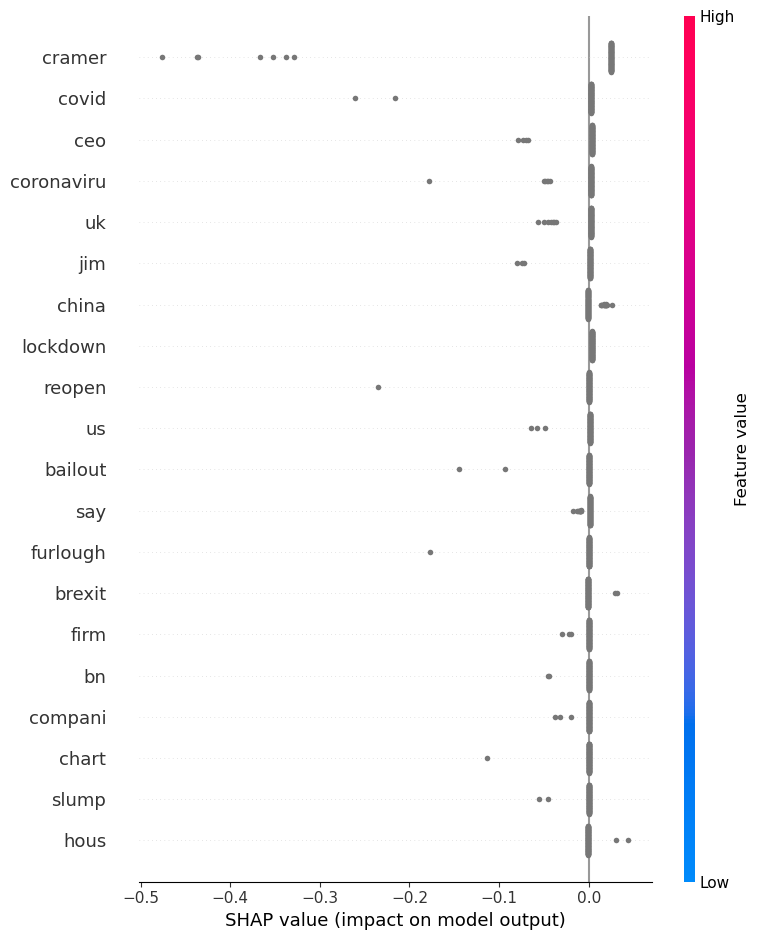

In [91]:

# Plot the summary of SHAP values
shap.summary_plot(shap_values_log, shap.sample(X_test_text_tfidf, 100), feature_names=vectorizer.get_feature_names_out())


In [93]:
shap_values_log

array([[-5.36628031e-06, -5.42083507e-05,  3.94683472e-05, ...,
        -5.73825900e-05, -7.25466682e-06, -5.70320393e-05],
       [-5.36628031e-06, -5.42083507e-05,  3.94683472e-05, ...,
        -5.73825900e-05, -7.25466682e-06, -5.70320393e-05],
       [-5.36628031e-06, -5.42083507e-05,  3.94683472e-05, ...,
        -5.73825900e-05, -7.25466682e-06, -5.70320393e-05],
       ...,
       [-5.36628031e-06, -5.42083507e-05,  3.94683472e-05, ...,
        -5.73825900e-05, -7.25466682e-06, -5.70320393e-05],
       [-5.36628031e-06, -5.42083507e-05,  3.94683472e-05, ...,
        -5.73825900e-05, -7.25466682e-06, -5.70320393e-05],
       [-5.36628031e-06, -5.42083507e-05,  3.94683472e-05, ...,
        -5.73825900e-05, -7.25466682e-06, -5.70320393e-05]])

In [107]:
test_data=shap.sample(X_test_text_tfidf, 100)
# Compute SHAP values for a specific instance (e.g., first instance in test data)
instance_index = 0
shap_values_instance = explainer_log.shap_values(test_data[instance_index].toarray())

# Draw the SHAP force plot for the instance
shap.force_plot(explainer_log.expected_value, shap_values_instance, test_data[instance_index].toarray(), feature_names=vectorizer.get_feature_names_out())
